In [1]:
from IPython.display import display
import spot
from spot.jupyter import display_inline
spot.setup(show_default='.tvb')
from product import async_prod

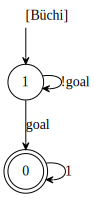

In [2]:
# System specification
aut_sys = spot.translate('F(goal)', 'Buchi', 'state-based', 'complete'); aut_sys.show("v")

In [3]:
# How to get rid of the redundant transition-based acceptance label from state 0 to 2?
print(aut_sys.to_str('hoa'))

HOA: v1
States: 2
Start: 1
AP: 1 "goal"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels state-acc complete
properties: deterministic stutter-invariant terminal
--BODY--
State: 0 {0}
[t] 0
State: 1
[0] 0
[!0] 1
--END--


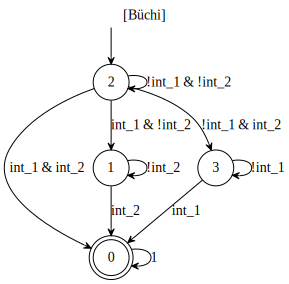

In [4]:
# Tester spec:
aut_test = spot.translate('F(int_1) & F(int_2)', 'Buchi', 'state-based', 'complete'); aut_test.show("v")

[(1, 2, 0)]
----------------------------------
new edge in todo: (1, 2, 0)
[(0, 2, 1), (1, 0, 2), (1, 1, 3), (1, 3, 4)]
----------------------------------
new edge in todo: (1, 3, 4)
[(0, 2, 1), (1, 0, 2), (1, 1, 3), (0, 3, 5)]
----------------------------------
new edge in todo: (0, 3, 5)
[(0, 2, 1), (1, 0, 2), (1, 1, 3), (0, 0, 6)]
----------------------------------
new edge in todo: (0, 0, 6)
[(0, 2, 1), (1, 0, 2), (1, 1, 3)]
----------------------------------
new edge in todo: (1, 1, 3)
[(0, 2, 1), (1, 0, 2), (0, 1, 7)]
----------------------------------
new edge in todo: (0, 1, 7)
[(0, 2, 1), (1, 0, 2)]
----------------------------------
new edge in todo: (1, 0, 2)
[(0, 2, 1)]
----------------------------------
new edge in todo: (0, 2, 1)


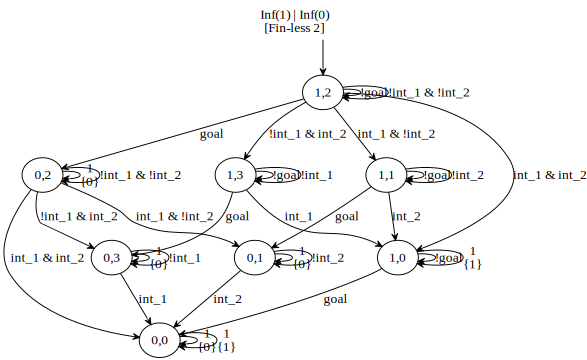

In [5]:
aut_prod, states_prod = async_prod(aut_sys, aut_test); aut_prod.show("v")

In [6]:
states_prod

{(1, 2): 0,
 (0, 2): 1,
 (1, 0): 2,
 (1, 1): 3,
 (1, 3): 4,
 (0, 3): 5,
 (0, 0): 6,
 (0, 1): 7}

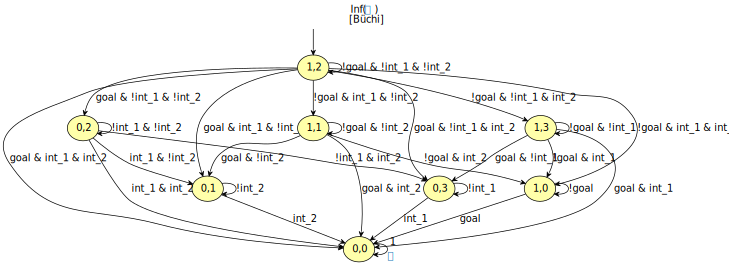

In [7]:
# Patrolling car asynchronous product automaton:
# a_sys = spot.translate('F(park & F(home))', 'Buchi', 'state-based', 'complete')
# a_test = spot.translate(' G(park -> F(refuel))', 'Buchi', 'state-based', 'complete')
a_sync_prod = spot.product(aut_sys, aut_test); a_sync_prod

[(1, 2, 0)]
----------------------------------
new edge in todo: (1, 2, 0)
[(0, 2, 1), (1, 0, 2), (1, 1, 3), (1, 3, 4)]
----------------------------------
new edge in todo: (1, 3, 4)
[(0, 2, 1), (1, 0, 2), (1, 1, 3), (0, 3, 5)]
----------------------------------
new edge in todo: (0, 3, 5)
[(0, 2, 1), (1, 0, 2), (1, 1, 3), (0, 0, 6)]
----------------------------------
new edge in todo: (0, 0, 6)
[(0, 2, 1), (1, 0, 2), (1, 1, 3)]
----------------------------------
new edge in todo: (1, 1, 3)
[(0, 2, 1), (1, 0, 2), (0, 1, 7)]
----------------------------------
new edge in todo: (0, 1, 7)
[(0, 2, 1), (1, 0, 2)]
----------------------------------
new edge in todo: (1, 0, 2)
[(0, 2, 1)]
----------------------------------
new edge in todo: (0, 2, 1)


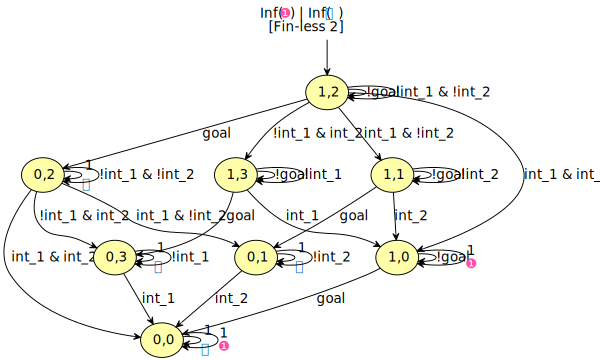

In [8]:
a_async_prod, states = async_prod(aut_sys, aut_test)
a_async_prod